# Project Update Report - Sinan Zhang, Sani Djaya, and Jiming Wu

## 1.1 Overall Objectives

The major goal of this project is to get an understanding of the crimes occurred in NYC and to make predictions on the likelihood of the type and time of certain crimes. More specifically, we would like to first obtain descriptive statistics of crimes in NYC as well as visualizing crime patterns including locations, dates, etc. Based on the observations, we will dig deeper into the relationships between crime occurrences and other demographic factors such as gender, age, and race using predictive models. By the end of the day, we hope to provide valuable information for NYPD in terms of preventing and targeting crimes in a more efficient way.

## 2.1 Data Description

We decided to use only the data of 2018 because that is the most recent year. Just recently, we started to have access to criminal data throughout the entire year. There are 460,000 rows in the dataset so we believed that would be enough for our analysis. The dataset includes 35 columns, including the date, time, location of each occurrence, the severity of occurrences, and identity information of suspects and victims. To be more specific, we will be mostly focusing on fields including CMPLNT_FR_DT (exact date of occurrences), CMPLNT_FR_TM (exact time of occurrences), LAW_CAT_CD (level of offense), LOC_OF_OCCUR_DESC (specific location of occurrence, fields associated with suspects’ and victims’ information. Please refer to the appendix for all fields’ names and description of each column. 

## 3.1 Questions To Ponder

As we were envisioning for the project, we thought of 10 questions that we wanted our analysis to answer:

- What are the top 20 crimes that happened the most in NYC?
- Which borough has the most crimes in 2018?
- What race/age group/gender of people are more likely to become victims/suspects?
- What is the number of different levels of offenses in each borough?
- What are the top 5 common crimes in the top 3 boroughs with the most crime?
- What are the trends of the number of top 5 crimes throughout the entire year?
- Do top 5 types of crimes occur more frequently on weekends or weekdays in each borough?
- What is the number of complaints of the 4 most common 4 types of crimes at different times of a day?
- Which months are crimes more likely to occur?
- For burglary specifically, what happened on Fridays? Where did those incidents occur?

Therefore, for our analysis, we will be answering these questions one by one in sequence, which will be indicated by subtitles.

## 4.1 Preprocessing Tasks

While doing some initial exploration into the dataset, we noticed that there were a few interesting entries in the dates. The dataset includes records that go all the way back to 1948. There was only 1 record in 1948, 1951, 1969, and so on. Looking to more recent years, 2017 has about 7400 entries, which implies that the dataset does not have a full record of crime reports in NYC prior to 2018. Thus, we will only be looking at 2018 entries. Additionally, we found 18 entry errors from 2018. The dates were recorded as 1018 or 1028.  

First of all, we selected columns that will be used for future analysis, which narrows down to 15 variables. Secondly, we noticed that there are some issues with the date variable (CMPLNT_FR_DT) that needs more work on, so we split it up to three distinct variables that are “YEAR”, “MONTH” and “DAY”.  For the “YEAR” variable, we discovered that it contains values like “1018” and “1028”, for which we have proved to be “2018” based on the values of other columns. Therefore, we replaced these two values with “2018” and then filtered our dataset for only 2018 data. 

We then started dealing with missing values. We first checked variables that contain missing values as well as calculate the percentages of missing values for each variable. As it turns out, five out of eight variables have missing values for less than 0.5%, which could be neglected for now based on our judgment. The rest three variables are all about suspect information, which makes sense because the suspects might end up not being caught. Although about 25% of the values are missing, we decided to keep them for now because we do not want to lose 25% of the information for the entire dataset. Later on, we are thinking of using only suspect information to generate some descriptive statistics and visualizations to see which sex, race and age of people are more likely to become a suspect in NYC.


### 4.1.1 Load the data

In [105]:
#Loading libraries
# import folium
# from folium import plugins
# from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from IPython.display import Image

# init_notebook_mode(connected=True)

In [106]:
df = pd.read_csv("/Users/sanidjaya/Documents/BUDT758X/project/NYPD_Complaint_Data_Current__Year_To_Date_.csv")
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,651421035,41.0,BRONX,11/28/2018,00:00:00,11/28/2018,00:01:00,COMPLETED,NaN,NaN,...,U,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN
1,149013323,14.0,MANHATTAN,12/31/2018,23:40:00,12/31/2018,23:50:00,COMPLETED,NaN,NaN,...,NaN,NaN,45-64,WHITE,F,987866.0,214721.0,40.756044,-73.986950,"(40.75604353500006, -73.98694954399997)"
2,642981531,73.0,BROOKLYN,12/31/2018,23:30:00,12/31/2018,23:40:00,COMPLETED,NaN,NaN,...,F,NaN,18-24,WHITE HISPANIC,F,1006995.0,185258.0,40.675146,-73.918003,"(40.67514616200003, -73.91800323399997)"
3,429685363,67.0,BROOKLYN,12/31/2018,23:20:00,12/31/2018,23:30:00,COMPLETED,NaN,NaN,...,M,NaN,25-44,BLACK,F,999584.0,169903.0,40.633016,-73.944756,"(40.63301598000004, -73.94475559899996)"
4,290330841,5.0,MANHATTAN,12/31/2018,23:15:00,12/31/2018,23:20:00,COMPLETED,NaN,NaN,...,U,NaN,25-44,WHITE,M,986164.0,202140.0,40.721512,-73.993096,"(40.72151233500005, -73.99309646799998)"


### 4.1.2 Select variables

We selected variables that we believe will be helpful for our project, which includes 
- Names of boroughs
- The date and time when each occurrence took place
- Level of offences (more general)
- Types of crimes (more specific)
- Suspect and victim demographics
- Coordinates for crime occurrences.

In [107]:
df = df[['BORO_NM','CMPLNT_FR_DT',"CMPLNT_FR_TM","CRM_ATPT_CPTD_CD","LAW_CAT_CD",
        "OFNS_DESC","PREM_TYP_DESC","SUSP_AGE_GROUP","SUSP_RACE","SUSP_SEX","VIC_AGE_GROUP",
        "VIC_RACE","VIC_SEX", "Latitude", "Longitude"]]

### 4.1.3 Clean the date variable

In [108]:
#Extract year, month and day from the date column
df['YEAR'] = df['CMPLNT_FR_DT'].str.split('/').str.get(2)
df['MONTH'] = df['CMPLNT_FR_DT'].str.split('/').str.get(0)
df['DAY'] = df['CMPLNT_FR_DT'].str.split('/').str.get(1)

In [109]:
#Fix entry errors in year variable
df['YEAR'] = df['YEAR'].replace(['1018', '1028'], '2018')

As mentioned above, we are keeping only incidents occurred in 2018, which captures the seasonality factors and also show us the most recent statistics about crimes in NYC.

We also grouped by YEAR to see the trend in the number of incidents in recent decades. As you may notice, there is a peak in 2018 and the number is almost close to zero before 2018, which didn't make any sense to us. Our understanding is that this dataset contains complete records for crimes ONLY for 2018. Before 2018, the criminal records were either not aappropriately entered into the system or simply not presented in this dataset. Therefore, the best way to deal with this situation is to extract data for 2018 only.

In [110]:
#Incident number in each year
inc_yr = df.groupby(['YEAR']).size()
inc_yr

YEAR
1016         2
1017         1
1025         1
1912         1
1918         4
1928         1
1948         1
1951         1
1968         1
1969         1
1970         1
1971         5
1972         3
1973         4
1974         2
1977         3
1978         3
1979         4
1980         2
1981         3
1982         2
1983         2
1984         3
1985         5
1986         2
1989         4
1990         1
1991         6
1992         2
1993        10
1994         7
1995         8
1996         4
1997         6
1998        11
1999        14
2000        16
2001        27
2002        21
2003        21
2004        13
2005        21
2006        28
2007        55
2008        77
2009        49
2010       103
2011       104
2012       133
2013       165
2014       233
2015       488
2016       872
2017      8474
2018    453034
dtype: int64

In [111]:
#Select data from 2017 and 2018
df = df[df['YEAR']=='2018']

In [112]:
#Combine month, day and year to a new date variable
df['CMPLNT_FR_DT'] = df['MONTH'] + '/' + df['DAY'] + '/' + df['YEAR']

# del df['MONTH']
# del df['YEAR']
# del df['DAY']

### 4.1.4 Work with Missing values

We first checked to see which columns contain missing values and then calculated the percentages of missing values out of the entire dataset.

In [113]:
#Check missing values
df.columns[df.isnull().any()]

Index(['BORO_NM', 'OFNS_DESC', 'PREM_TYP_DESC', 'SUSP_AGE_GROUP', 'SUSP_RACE',
       'SUSP_SEX', 'Latitude', 'Longitude'],
      dtype='object')

In [114]:
#Missing value counts in each of these columns
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

OFNS_DESC         0.000013
Latitude          0.000086
Longitude         0.000086
BORO_NM           0.000631
PREM_TYP_DESC     0.004167
SUSP_AGE_GROUP    0.252842
SUSP_RACE         0.252842
SUSP_SEX          0.252842
dtype: float64

Apparently, we do not have too many missing values in our dataset except for suspect demographics, for which most of them are below 0.5%. Our strategy is to deal with these missing values differently depending on the circumstances, so for some cases we will just remove all of them while keeping them for our analysis in other cases. It will be demonstrated in more details in our analysis.

## 5.1 Data Analysis

### 5.1.1 Descriptive Statistics

#### 5.1.1.1 Number of Crimes by Borough & Top 20 Types of Crimes in 2018

BORO_NM
BROOKLYN         133711
MANHATTAN        111796
BRONX             98895
QUEENS            87993
STATEN ISLAND     20353
dtype: int64
OFNS_DESC
PETIT LARCENY                     84789
HARRASSMENT 2                     69299
ASSAULT 3 & RELATED OFFENSES      52892
CRIMINAL MISCHIEF & RELATED OF    46383
GRAND LARCENY                     41234
FELONY ASSAULT                    20106
OFF. AGNST PUB ORD SENSBLTY &     19950
DANGEROUS DRUGS                   15166
MISCELLANEOUS PENAL LAW           13027
ROBBERY                           12883
BURGLARY                          11568
DANGEROUS WEAPONS                  7877
OFFENSES AGAINST PUBLIC ADMINI     7459
VEHICLE AND TRAFFIC LAWS           6700
SEX CRIMES                         6309
GRAND LARCENY OF MOTOR VEHICLE     5333
FORGERY                            5021
INTOXICATED & IMPAIRED DRIVING     4975
THEFT-FRAUD                        3451
CRIMINAL TRESPASS                  3259
dtype: int64


[(0.0672297756628144, 'Crime rate in Bronx'),
 (0.06714474474474474, 'Crime rate in Manhattan'),
 (0.05047602869007173, 'Crime rate in Brooklyn'),
 (0.042450016476938544, 'Crime rate in Staten Island'),
 (0.03730097498940229, 'Crime rate in Queens')]

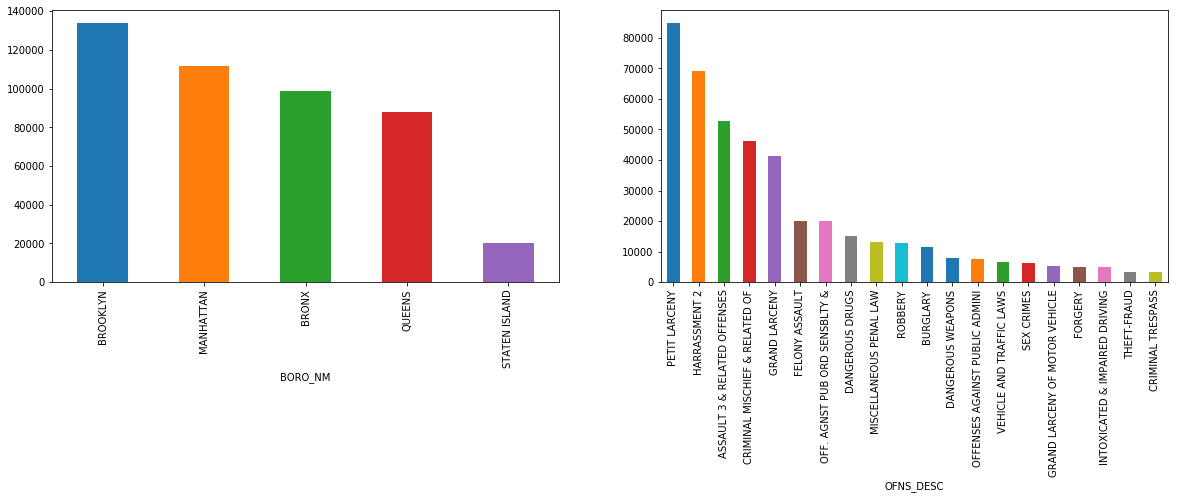

In [115]:
plt.subplot(1,2,1)
num_complaints_boro = df.groupby('BORO_NM').size().sort_values(ascending=False).nlargest(20)
num_complaints_boro.plot(kind='bar',figsize=(20,5))
print(num_complaints_boro)

plt.subplot(1,2,2)
brook_rate = num_complaints_boro[0]/2649000
manh_rate = num_complaints_boro[1]/1665000
bronx_rate = num_complaints_boro[2]/1471000
queens_rate = num_complaints_boro[3]/2359000
staten_rate = num_complaints_boro[4]/479458

# Number of occurances by crime description
top20_complaints = df.groupby('OFNS_DESC').size().sort_values(ascending=False).nlargest(20)
top20_complaints.plot(kind='bar',figsize=(20,5))
print(top20_complaints)

sorted([(brook_rate,"Crime rate in Brooklyn"), 
 (manh_rate,"Crime rate in Manhattan"), 
 (bronx_rate,"Crime rate in Bronx" ), 
 (queens_rate,"Crime rate in Queens"),
 (staten_rate,"Crime rate in Staten Island")], reverse=True)

#### 5.1.1.2 The percentage of top 5 crimes

In [116]:
petit_larc = top20_complaints['PETIT LARCENY']/len(df)
harr2 = top20_complaints['HARRASSMENT 2']/len(df)
assault3 = top20_complaints['ASSAULT 3 & RELATED OFFENSES']/len(df)
crim_misch = top20_complaints['CRIMINAL MISCHIEF & RELATED OF']/len(df)
grand_larc = top20_complaints['GRAND LARCENY']/len(df)

sum([petit_larc,harr2,assault3,crim_misch,grand_larc])

0.6502756967468225

### Q: What are the top 20 crimes that happened the most in NYC?

We wanted to explore what kinds of crime were the most common in 2018. Here we can see the top 20 crimes that are reported in New York City. We can see that Petit Larceny, 2nd Degree Harrassment, 3rd Degree Assault, Criminal Mischief, and Grand Larceny are the top 5 crimes in the city. Moreover, the top 5 types of crimes make up 64% of the total crimes reported.

### Q: Which borough has the most crimes in 2018?

Looking at the graph above on the left, we can see Brooklyn, Manhattan, and the Bronx are the top 3 cities with the largest number of crimes in the 5 boroughs of New York City. We wondered what the crime rate (number of crime/population) was in these 3 boroughs.

From the sorted crime rates shown above, we can see that Manhattan and the Bronx have a very similar crime rate of about 6.7%, which is the highest among all five boroughs. From there each following borough's crime rate drops by about 0.1% with Staten Island have the lowest crime rate.

#### 5.1.1.3 Demographics about Suspsects and Victims

### Q: What race/age group/gender of people are most likely to become victimes/suspects?

In [117]:
# clean VIC_SEX column
df['VIC_SEX'] = df['VIC_SEX'].replace(['D', 'E', 'U'], 'UNKNOWNs')

In [118]:
# create legend table for victim race map
legend = [['UNKNOWN', 'white'], ['BLACK', 'red'], ['WHITE', 'blue'],
          ['WHITE HISPANIC', 'purple'], ['ASIAN / PACIFIC ISLANDER', 'yellow'],
          ['AMERICAN INDIAN/ALASKAN NATIVE', 'green'],
          ['BLACK HISPANIC', 'pink']] 
legend = pd.DataFrame(legend, columns = ['Race', 'Color']) 
print(legend)


# VISUALIZE VICTIM RACE ON THE BASE MAP
import matplotlib.image as mpimg
ny_img = mpimg.imread('ny_img.png')

x = df['Longitude']
y = df['Latitude']

colors = {'UNKNOWN':'white', 'BLACK':'#ff4646', 
          'WHITE':'#74a9ee', 
          'WHITE HISPANIC':'#f1ebf2',
          'ASIAN / PACIFIC ISLANDER':'#f4c82b', 
          'AMERICAN INDIAN/ALASKAN NATIVE':'#81d742',
          'BLACK HISPANIC':'#df4171'}

ax = df.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(15,15),
             c=df['VIC_RACE'].apply(lambda x: colors[x]), 
             alpha=0.5)

plt.imshow(ny_img, extent=[-74.29, -73.68, 40.494, 40.915], alpha=0.5)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)

plt.figure(figsize=(12, 12))
plt.show()

                             Race   Color
0                         UNKNOWN   white
1                           BLACK     red
2                           WHITE    blue
3                  WHITE HISPANIC  purple
4        ASIAN / PACIFIC ISLANDER  yellow
5  AMERICAN INDIAN/ALASKAN NATIVE   green
6                  BLACK HISPANIC    pink


FileNotFoundError: [Errno 2] No such file or directory: 'ny_img.png'

As shown in the table above, we noticed that 30% of the victim races are missing in our data. Regardless of that, the top three races of victims are Black (25.1%), White Hispanic (17.1%), and White (15.9%). The rest of the races including Asian (7%), Black Hispanic (3.9%), and American Indian (0.6%) only count for around a small part of the total victim races. Given the large portion of missing values in terms of victim races, we shall be more conservative about the conclusion generated from the table.

This scatter map shows the distribution of victims in NYC categoried by Race. Each dot indicates one victim in the dataset based on their location information, and each color represents that victim's race.

What we can see from the map is that, despite the white dots which represents missing data, there are three major colors, including blue(White), red(Black), and yellow(Asian and Pacific islanders). 

These three groups aggregate in certain areas. For example:

At the bottom left corner of this map, which is Staten Island, most of the victims are white, and several other groups scatter in the upper island. 

There are three main areas that have a lot of black victims in South Queens, East Broklyn, and The Bronx.

The majority of asian and pacific islander victims presented in Queens other than other areas.

In [ ]:
# replace na value
df['susp_race'] = df['SUSP_RACE'].fillna('UNKNOWN')

# create legend table for suspect map
legend = [['UNKNOWN', 'white'], ['BLACK', 'red'], ['WHITE', 'blue'],
          ['WHITE HISPANIC', 'purple'], ['ASIAN / PACIFIC ISLANDER', 'yellow'],
          ['AMERICAN INDIAN/ALASKAN NATIVE', 'green'],
          ['BLACK HISPANIC', 'pink']] 
legend = pd.DataFrame(legend, columns = ['Race', 'Color']) 
print(legend)

# VISUALIZE SUSPECT RACE ON THE BASE MAP
x = df['Longitude']
y = df['Latitude']

colors = {'UNKNOWN':'white', 'BLACK':'#ff4646', 
          'WHITE':'#74a9ee', 
          'WHITE HISPANIC':'#f1ebf2',
          'ASIAN / PACIFIC ISLANDER':'#f4c82b', 
          'AMERICAN INDIAN/ALASKAN NATIVE':'#81d742',
          'BLACK HISPANIC':'#df4171'}

ax = df.plot(kind='scatter', x='Longitude', y='Latitude', figsize=(15,15),
             c=df['susp_race'].apply(lambda x: colors[x]), 
             alpha=0.5)

plt.imshow(ny_img, extent=[-74.29, -73.68, 40.494, 40.915], alpha=0.5)
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)

plt.figure(figsize=(12, 12))
plt.show()

As shown in the table above, we discovered nearly 43% of suspect races are missing in our data. Regardless of the missing data, 28.5% of the suspects are Black, and 13.4% are White Hispanic. The rest suspect races including White (7.7%), Black Hispanic (4.18%), Asian (2.83%), and American Indian (0.25%). Still, we are not 100% sure about the exact distribution of suspect races as we have no idea about what the missing values are.

This scatter map shows the distribution of suspects in NYC categoried by Race. Each dot indicates one suspect in the dataset based on their location information, and each color represents that suspect's race.

There are much more missing values in suspect data than victim data. This is very obvious in Brooklyn, Queens, and Staten Island.

We can see that there's noticeable difference with the victim distribution in Manhattan. Comparing to the victim race map, lower and middle Manhattan have many Black suspects while they have many White victims.

Other than that, the distribution of suspects race and victim race is similar. We think this might indicates that within those area that has similar distribution patterns, that certain race has higher population than the other races. Also in those areas, suspects are more likely to assult victims with the same race.

In [ ]:
# clean SUSP_SEX column
df['SUSP_SEX'] = df['SUSP_SEX'].replace('U', 'UNKNOWN')

# SUSPECT GENDER PERCENTAGE
susp_sex = pd.concat([df['SUSP_SEX'].value_counts(), 
                      df['SUSP_SEX'].value_counts(normalize=True).mul(100)], axis=1, keys=('counts', 'percentage'))
susp_sex

As shown in the table above, there are nearly 40% unknown records. 45.8% of total suspects are male, which almost tripled the number of female suspects 14.2%. This indicates that male have much higher incentives to commit a crime than female based on our data set.

In [ ]:
# clean VIC_SEX column
df['VIC_SEX'] = df['VIC_SEX'].replace(['D', 'E', 'U'], 'UNKNOWN')

# SUSPECT GENDER PERCENTAGE
susp_sex = pd.concat([df['VIC_SEX'].value_counts(), 
                      df['VIC_SEX'].value_counts(normalize=True).mul(100)], axis=1, keys=('counts', 'percentage'))
susp_sex

As shown in the table above, there are nearly 26% unknown records. 39.5% of total victims are female, and 34.4% of the total victims are male. There is no large difference from two genders.

In [ ]:
# clean VIC_AGE_GROUP column
df['VIC_AGE_GROUP'] = df['VIC_AGE_GROUP'].replace(['-1', '-956', '-974', '957', '-3', '-43', '1017',
                                                    '-948', '936', '-940', '-966', '-972', '-952', '-958', '-67',
                                                    '-5', '-4', '-2', '-955', '-55', '953', '-61', '-962', '-76',
                                                    '-59', '948', '-970', '951', '954', '-51', '965', '-970',
                                                    '-968', '929', '922', '970'], 'UNKNOWN')

# clean SUSP_AGE_GROUP colomn
df['SUSP_AGE_GROUP'] = df['SUSP_AGE_GROUP'].replace(['-1', '-956', '-974', '957', '-3', '-43', '1017',
                                                    '-948', '-978', '-2', '924', '955', '922', '954', '1967',
                                                    '948', '952', '-974', '-80', '938', '-939', '2018', '1018',
                                                    '928', '-941', '1012', '-63', '920'], 'UNKNOWN')

In [ ]:
# pivot table for VICTIM AGE AND GENDER
df_vict = df[['VIC_AGE_GROUP','VIC_SEX']]
df_vict.groupby(['VIC_AGE_GROUP', 'VIC_SEX']).size()

In [ ]:
# pivot table for SUSPECT AGE AND GENDER
df_susp = df[['SUSP_AGE_GROUP','SUSP_SEX']]
df_susp.groupby(['SUSP_AGE_GROUP','SUSP_SEX']).size()

In [ ]:
# VICTIM AGE VS GENDER BAR CHART
female_bins = np.array([-10339, -26522, -86655, -40180, -9634])
male_bins = np.array([8342, 17605, 70610, 44359, 9294])

y = ['<18', '18-24', '25-44', '45-64', '65+']

layout = go.Layout(title='Victim Age vs Gender',
                   yaxis=go.layout.YAxis(title='Age Group'),
                   xaxis=go.layout.XAxis(
                       range=[-100000, 100000],
                       tickvals=[-80000, -60000, -40000, -20000, 0, 20000, 40000, 60000, 80000],
                       ticktext=[80000, 60000, 40000, 20000, 0, 20000, 40000, 60000, 80000],
                       title='Number of Victims'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=male_bins,
               orientation='h',
               name='Male',
               text=male_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=female_bins,
               orientation='h',
               name='Female',
               text=-1 * female_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=data, layout=layout)) 



# SUSPECT AGE VS GENDER BAR CHART
female_bins = np.array([-3551, -10026, -25882, -9628, -986])
male_bins = np.array([8239, 30382, 86859, 33203, 2772])

y = ['<18', '18-24', '25-44', '45-64', '65+']

layout = go.Layout(title='Suspect Age vs Gender',
                   yaxis=go.layout.YAxis(title='Age Group'),
                   xaxis=go.layout.XAxis(
                       range=[-100000, 100000],
                       tickvals=[-80000, -60000, -40000, -20000, 0, 20000, 40000, 60000, 80000],
                       ticktext=[80000, 60000, 40000, 20000, 0, 20000, 40000, 60000, 80000],
                       title='Number of Victims'),
                   barmode='overlay',
                   bargap=0.1)

data = [go.Bar(y=y,
               x=male_bins,
               orientation='h',
               name='Male',
               text=male_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=female_bins,
               orientation='h',
               name='Female',
               text=-1 * female_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=data, layout=layout)) 

In both bar charts, we removed all unknown records.

In Victim Age vs Gender Bar Chart, we discovered that female has slightly more victims in most age groups other than 45 to 64 years old. Especially for two age groups in 18 to 44 years old, the victim is much more likely to be a female than a male.

In Suspect Age vs Gender Bar Chart, we discovered that male have way more suspects in each age group than female. This means a suspect is much more likely to be a male other than female no matter how old he or she is.

In [ ]:
# VICTIM DISTRIBUTION BASED ON AGE, RACE, AND SEX
vict_dist = df.groupby(['VIC_AGE_GROUP','VIC_RACE','VIC_SEX']).size().to_frame('count').sort_values(by=['count'], ascending=False).reset_index().head(11)
vict_dist['percentage'] = vict_dist['count']/len(df)*100
vict_dist

This table above shows the top 10 groups of victim based on their age, race, and gender.

Missing data consist 26% of the total records.

Despite that, we can see from the table that black females in between 25 to 44 years old are the most likely to be the victim in Manhattan because this cateogory consists 7.3% of total records, which is almost doubled the second and third group in the ranking.

For the top 6 categories, the most victims are all between 25 to 44 years old, which shows that this age groups are more likely to be targeted than the other age gourps, especially for 3 races including Black, White Hispanic, and White females and males.

The following age group is 45 to 64 years old, which includes black females, black males and white male.

Overall, we can also conclude that black is most likely to become victims in Manhattan area based on our data set.

In [ ]:
# SUSPECT DISTRIBUTION BASED ON AGE, RACE, AND SEX
susp_dist = df.groupby(['SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX']).size().to_frame('count').sort_values(by=['count'], ascending=False).reset_index().head(11)
susp_dist['percentage'] = susp_dist['count']/len(df)*100
susp_dist

This table above shows the top 10 groups of suspects based on their age, race, and gender.

Missing data are more than those in the victim data. Missing values scatter in all of the three columns, so it would be more uncertain to make overall conclusions based on the table.

Based on the existing meaningful data in the table, we can see that black male between 25 to 44 years old have the largest portion of total records. The second highest number of suspects are white hispanic male between 25 to 44 years old.

Black male with all ages have the most number of suspects comparing to other groups. Besides that white male between 25 to 44 years old and white hispanic male between 18 to 44 years old have a large number of suspects based on the data set.

In [ ]:
x = df['Longitude']
y = df['Latitude']

colors = {'UNKNOWN':'white', 'BLACK':'blue', 
          'WHITE':'red', 
          'WHITE HISPANIC':'#f1ebf2',
          'ASIAN / PACIFIC ISLANDER':'#ecee0d', 
          'AMERICAN INDIAN/ALASKAN NATIVE':'#2b70e7',
          'BLACK HISPANIC':'#df4171'}

plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=df['VIC_RACE'].apply(lambda x: colors[x]), alpha=0.5)
plt.show()

#### 5.1.1.4 Number of Incidents by Boroughs and Types of Offenses

In [ ]:
boros_crime = df.groupby(['BORO_NM','OFNS_DESC']).size().sort_values(ascending=False)
boros_crime.nlargest(20)

In [ ]:
boros_crime.nlargest(20).unstack().plot(kind='bar',figsize=(15,10), stacked=True)

### Q: What is the number of different types of offenses (more detailed classification) in each borough?

The graph above shows the top 20 crimes in NYC. By looking at the colors, we can see that the type of crimes are pretty consistent throughour the boroughs. The only exception is, the Bronx has a number of Dangerous Drugs reports instead of Grand Larceny similar to the other boroughs. 

Note that Staten Island does not show up on this graph as this graph is looking at the top 20 crimes in the NYC and then grouping them into the boroughs.

#### 5.1.1.5 Distribution of Crimes by Three Levels of Offenses with Victim Age Group, Sex or Race

Given the results we got for missing values, we already knew that about one quarter of suspect demographics is missing from our dataset. Thus, the conclusions we generated based on the stacked bar graphs below might not reflect the actual situation. Regardless of this, we would still like to include this information in our project as supporting evidence.

In [ ]:
#Select only victim demographics and the level of offense
vic = df[["LAW_CAT_CD", "VIC_AGE_GROUP", "VIC_RACE", "VIC_SEX"]]

#Level of offense and victim age groups
data1 = vic.groupby('VIC_AGE_GROUP')['LAW_CAT_CD'].value_counts()
data1 = data1.to_frame()
data1.columns = ['Count']
#data1

In [ ]:
#Level of offense by victim age groups
trace1_1 = go.Bar(
    x=['18-24', '25-44', '45-64', '<18', 'UNKNOWN'],
    y=[22587, 78459, 40133, 10226, 95576],
    name='Misdemeanor'
)
trace2_1 = go.Bar(
    x=['18-24', '25-44', '45-64', '<18', 'UNKNOWN'],
    y=[14129, 47612, 24534, 4652, 45109],
    name='Felony'
)
trace3_1 = go.Bar(
    x=['18-24', '25-44', '45-64', '<18', 'UNKNOWN'],
    y=[7417, 31244, 19898, 3803, 7655],
    name='Violation'
)

sum1 = [trace1_1, trace2_1, trace3_1]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=sum1, layout=layout)
iplot(fig, filename='stacked-bar')

Regardless of unknown data, people who are between 25 and 44 years old are most likely to be the victims of all three levels of offences (violation, felony and misdemeanor). The second largest victim group is people who are between 45 and 63. However, given the large portion of the unknown data, we cannot be certain about the conclusion. One thing we can be sure about is that among all three levels of offenses, misdemeanor happens the most frequently.

But one thing we can be certain about is that misdemeanor involves the largest number of victims, with felony and violation being the second and the third. 

In [119]:
#Level of offense and victim races
data2 = vic.groupby('VIC_RACE')['LAW_CAT_CD'].value_counts()
data2 = data2.to_frame()
data2.columns = ['Count']
#data2

NameError: name 'vic' is not defined

In [120]:
#Level of offense by victim races
trace1_2 = go.Bar(
    x=['AMER IND', 'ASIAN/PAC.ISL', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC'],
    y=[1226, 738, 56418, 9028, 92649, 33350, 39249],
    name='Misdemeanor'
)
trace2_2 = go.Bar(
    x=['AMER IND', 'ASIAN/PAC.ISL', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC'],
    y=[738, 11350, 31376, 4926, 40182, 25148, 22316],
    name='Felony'
)
trace3_2 = go.Bar(
    x=['AMER IND', 'ASIAN/PAC.ISL', 'BLACK', 'BLACK HISPANIC', 'UNKNOWN', 'WHITE', 'WHITE HISPANIC'],
    y=[577, 5282, 25884, 3551, 5033, 13601, 16089],
    name='Violation'
)

sum2 = [trace1_2, trace2_2, trace3_2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=sum2, layout=layout)
iplot(fig, filename='stacked-bar')

NameError: name 'go' is not defined

Regardless of the unknown data, we may say that Black people are most likely to be the victims of all crimes, with White Hispanic and White being the second and the third largest victim groups. However, given the large portion of the unknown data, our conclusion may not be exactly correct.

In [121]:
#Level of offense and victim sex
data3 = vic.groupby('VIC_SEX')['LAW_CAT_CD'].value_counts()
data3 = data3.to_frame()
data3.columns = ['Count']
#data3

NameError: name 'vic' is not defined

In [122]:
# Level of offense by victim sex
trace1_3 = go.Bar(
    x=['Female', 'Male', 'Unknown'],
    y=[85379, 79096, 82506],
    name='Misdemeanor'
)
trace2_3 = go.Bar(
    x=['Female', 'Male', 'Unknown'],
    y=[49550, 52194, 34292],
    name='Felony'
)
trace3_3 = go.Bar(
    x=['Female', 'Male', 'Unknown'],
    y=[44079, 24656, 1282],
    name='Violation'
)

sum3 = [trace1_3, trace2_3, trace3_3]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=sum3, layout=layout)
iplot(fig, filename='stacked-bar')

NameError: name 'go' is not defined

Regardless of the unknown data, we may say that there is a slightly higher probability for female to become the victim for violation and misdemeanor. As for felony, the likelihood of being the victim is almost the same for female and male. However, given the large portion of the unknown data, our conclusion may not be exactly correct.

Similar to victims, we also did analysis on suspects demographics. However, because of the large portion of missing values about suspects, the results we got were not satisfactory, which we decided to remove from our report later on.

#### 5.1.1.6 Time Series & Heatmaps

In [129]:
# create datetime to get day of week of each observation
# 0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday 

from datetime import datetime
df['DATETIME'] = df['CMPLNT_FR_DT'] + ' ' + df['CMPLNT_FR_TM']

convert_datetime = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S')
df['DATETIME'] = df['DATETIME'].apply(convert_datetime)

convert_dayofweek = lambda x: x.weekday()
df['DAY_OF_WEEK'] = df['DATETIME'].apply(convert_dayofweek)

# get day of month
get_dayofmonth = lambda x: x.month
df['MONTH'] = df['DATETIME'].apply(get_dayofmonth)

# get hour of the day
get_hour = lambda x: x.hour
df['HOUR'] = df['DATETIME'].apply(get_hour)

In [130]:
#Split up the original dataset by boroughs
df_manh = df[df['BORO_NM'] == 'MANHATTAN']
df_brook = df[df['BORO_NM'] == 'BROOKLYN']
df_bronx = df[df['BORO_NM'] == 'BRONX']
df_queens = df[df['BORO_NM'] == 'QUEENS']
df_staten = df[df['BORO_NM'] == 'STATEN ISLAND']

### Q: What are the top 5 common crimes in the top 3 boroughs with the most crime?

In [131]:
def top_crimes(df, n=5):
    return df.groupby(['OFNS_DESC']).size().nlargest(n)

# Looking at the top 5 common crimes in the top 3 boroughs with the most crime

# Top 5 common crimes in Manhattan
manh_top_crimes = top_crimes(df_manh)
print('Manhattan \n', manh_top_crimes, '\n')

# Top 5 common crimes in Brooklyn
brook_top_crimes = top_crimes(df_brook)
print('Brooklyn \n', brook_top_crimes, '\n')

# Top 5 common crimes in Bronx
bronx_top_crimes = top_crimes(df_bronx)
print('Bronx \n', bronx_top_crimes, '\n')

Manhattan 
 OFNS_DESC
PETIT LARCENY                     27262
GRAND LARCENY                     15913
HARRASSMENT 2                     14081
ASSAULT 3 & RELATED OFFENSES      10876
CRIMINAL MISCHIEF & RELATED OF     9341
dtype: int64 

Brooklyn 
 OFNS_DESC
PETIT LARCENY                     23642
HARRASSMENT 2                     20533
ASSAULT 3 & RELATED OFFENSES      14940
CRIMINAL MISCHIEF & RELATED OF    14329
GRAND LARCENY                     10693
dtype: int64 

Bronx 
 OFNS_DESC
HARRASSMENT 2                     16024
PETIT LARCENY                     15102
ASSAULT 3 & RELATED OFFENSES      14289
CRIMINAL MISCHIEF & RELATED OF    10371
GRAND LARCENY                      6006
dtype: int64 



From this output we observe that Petit Larceny is the most common crime in Manhattan and Brooklyn, but not in Bronx. In Bronx the most common crime is 2nd Degree Harrassement.

### Q: What are the trends of the number of top 5 crimes throughout the entire year?

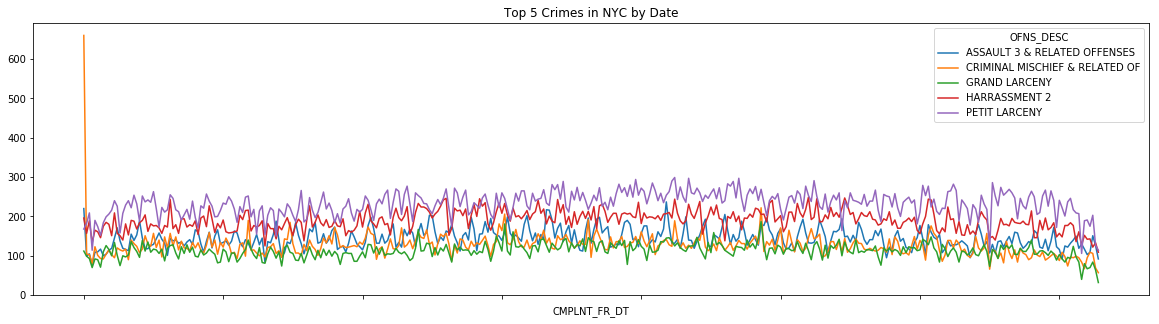

In [132]:
top_5_crimes = top20_complaints.head(5).keys().tolist()

df_top_crimes = df[df['OFNS_DESC'].isin(top_5_crimes)]
df_top_crimes = df_top_crimes.set_index('CMPLNT_FR_DT')
df_top_crimes.groupby(['CMPLNT_FR_DT','OFNS_DESC']).size().unstack().plot(legend=True, title='Top 5 Crimes in NYC by Date',figsize=(20,5))

Notice how Criminal Mischief has a huge spike on January 1st (New Years). This may be caused by the alcoholic induced celebration in New York City.

We also observe that there may be some sort of pattern to the crime rate occurance and the day of the week.

#### What happened on Jan. 1, 2018?

Text(0.5,1,'Number of Criminal Mischief Complaints in NYC by Borough and Time of Day')

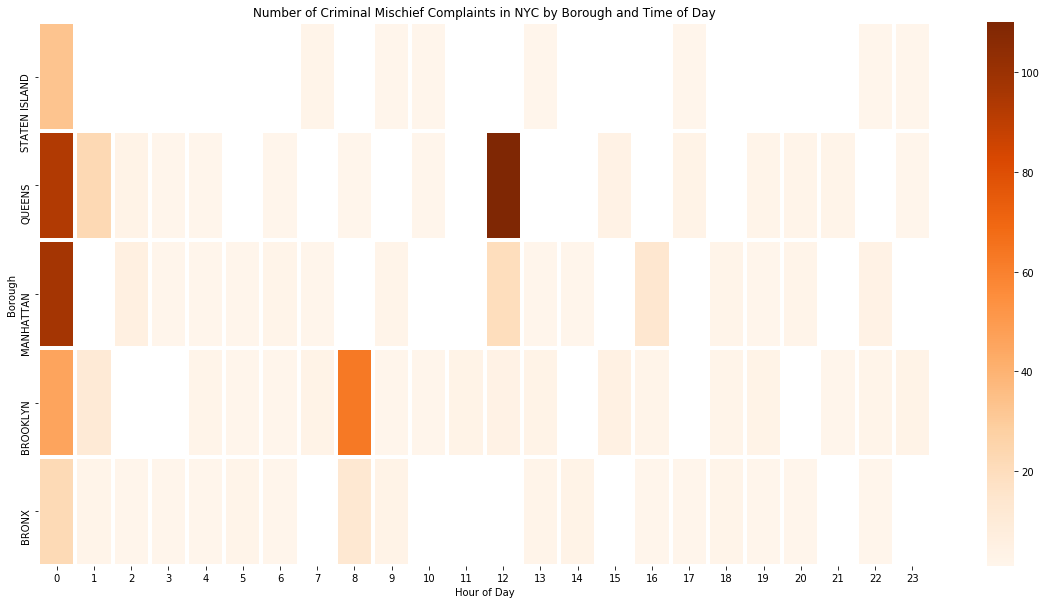

In [133]:
# Diving deeper into the spike of Criminal Mischief complaints on January 1st 

df_jan1 = df_top_crimes[df_top_crimes['OFNS_DESC'] == 'CRIMINAL MISCHIEF & RELATED OF'].loc['01/01/2018']
plt.figure(figsize=(20,10))
table = df_jan1.groupby(['BORO_NM','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='Oranges', linewidths=3);
g.invert_yaxis()

plt.xlabel('Hour of Day')
plt.ylabel('Borough')

plt.title('Number of Criminal Mischief Complaints in NYC by Borough and Time of Day')

On January 1st, we find a major spike in criminal mischief during the first hour of the new year with smaller spikes at 8 am and noon.

The original spike immediately after midnight is very likely caused by the celebration of the new year by New Yorkers across the city. The smaller spikes in Brooklyn at 8 am and in Queens at noon are unusual.

For the rest of the year, criminal mischief incidencts on a given hour in a given borough never exceed 18, but on Jan 1st Brooklyn had about 70 at 9 am and Queens had over 100 at noon. Lets look at the locations of these unusual occurances to see if we can see any patterns. 

##### Heatmap showing the distribution of criminal mischief on Jan. 1, 2018

First, looking at criminal mischief on all of Jan 1, we can see it spread out throughout the city as expected. 

In [128]:
Image(filename='jan1.png')

NameError: name 'Image' is not defined

#### Heatmap showing the distribution of criminal mischief at 12am on Jan. 1, 2018

At 12am, we can still see the criminal mischief is spread out throughout the city still. Interestingly, there is a concentration of criminal mischief occurances in the Upper West Side of Manhattan, but not downtown. We can also see that there is a spread of criminal mischief in Queens and Brooklyn as expected due to the celebration of the new year.

In [ ]:
Image(filename='jan1_0_Q.png')

##### Heatmap showing the distribution of criminal mischief at 8am on Jan. 1, 2018

At 8am, we see a concentration of criminal mischief in Brookyln near Coney Island.

In [ ]:
Image(filename='jan1_8am.png')

#### Heatmap showing the distribution of criminal mischief at 12pm on Jan. 1, 2018

And at noon, we see a concentration of criminal mischief around a 3 mile on Jamaica Avenue in Queens.

In [ ]:
Image(filename='jan1_12pm.png')

We did some research to look for any news articles or events that might have occured at 8am near Coney Island, Brooklyn and 12pm on Jamaica Aveneue, Queens, but found no information. So, this spike of criminal mischief is still unsolved. 

### Q: Which months are the top 5 types of crimes more likely to occur?

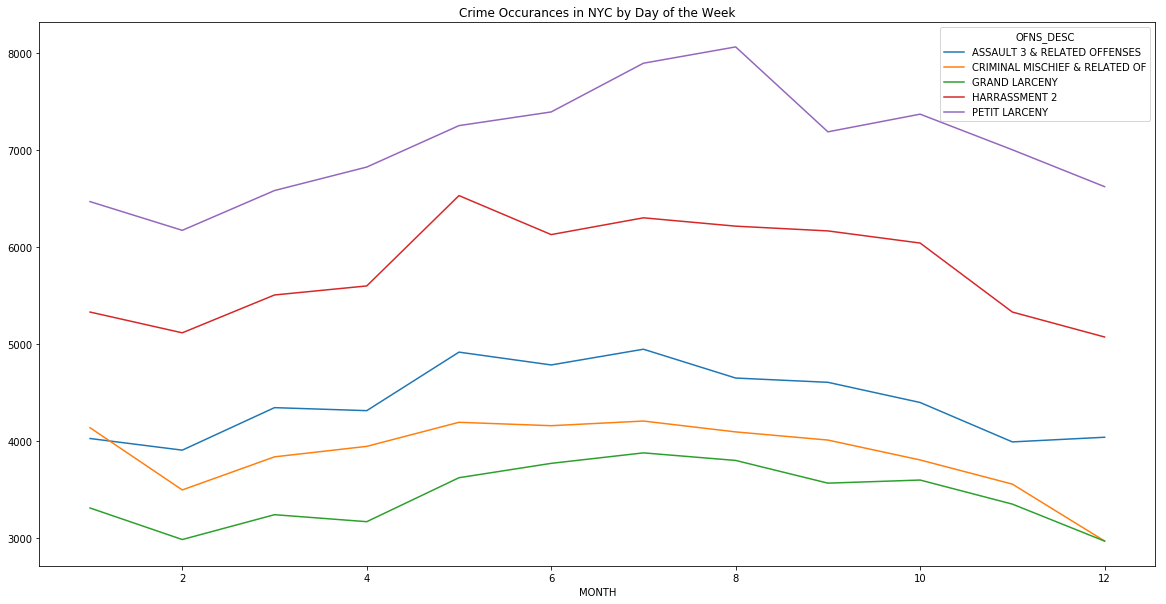

In [134]:
df_top_crimes.reset_index(inplace=True)
df_top_crimes.groupby(['MONTH','OFNS_DESC']).size().unstack().plot(legend=True,title='Crime Occurances in NYC by Day of the Week', figsize=(20,10))
plt.show()

We can see here that the months with the lowest crime rate is December and February. There seems to be an increase of crime starting in May and a decrease after August.

We suspect that in the winter months (December, January, and February) cause a reduction of crime because the cold weather discourages people to spend a lot of time outside leading to less opportunities for petit larceny, criminal mischief, 2nd degree harrassment, etc. Perhaps crime is down even further in December because of the holiday season. The average citizen is taking time away from work to spend time with their families. Maybe criminals are too.

Inversely, we suspect that crime is up in the warmer months because people are more likely to spend time outside and thus have more interactions with friends, families, and strangers.

### Q: Do top 5 types of crimes occur more frequently on weekends or weekdays in each borough?

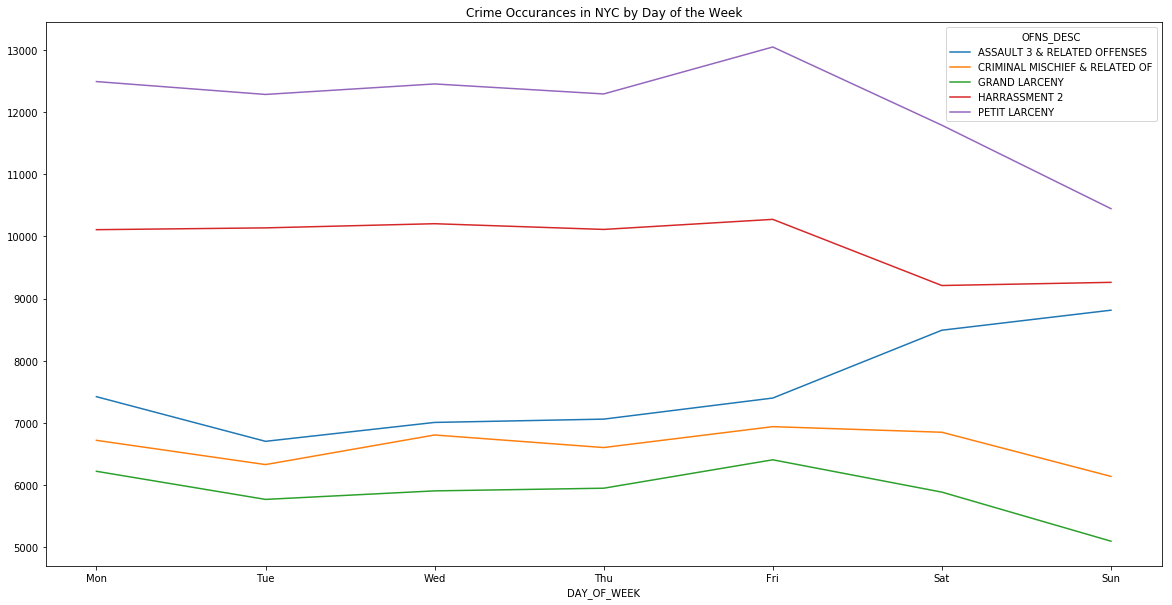

In [135]:
# Looking into the potential patterns in crime based on the day of week

# 0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday 
ndays = [0,1,2,3,4,5,6]
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

df_top_crimes.reset_index(inplace=True)
df_top_crimes.groupby(['DAY_OF_WEEK','OFNS_DESC']).size().unstack().plot(legend=True,title='Crime Occurances in NYC by Day of the Week', figsize=(20,10))
plt.xticks(ndays,days)
plt.show()

All 5 crimes except for 3rd Degree Assualt spike on Fridays.

Notice how the top 5 crimes all drop in the weekend hitting a low on Sundays except for 3rd Degree Assault. We think that 3rd Degree Assault increases due to alcoholic consumption on the weekends.

Lets looked deeper into the these complaints by diving into the time of day of these complaints as well.

### Q: What is the number complaints of the most common 4 types of crimes at different time of the day?

Text(0.5,1,'Number of 3rd Degree Assaults in NYC by Day of Week and Time of Day')

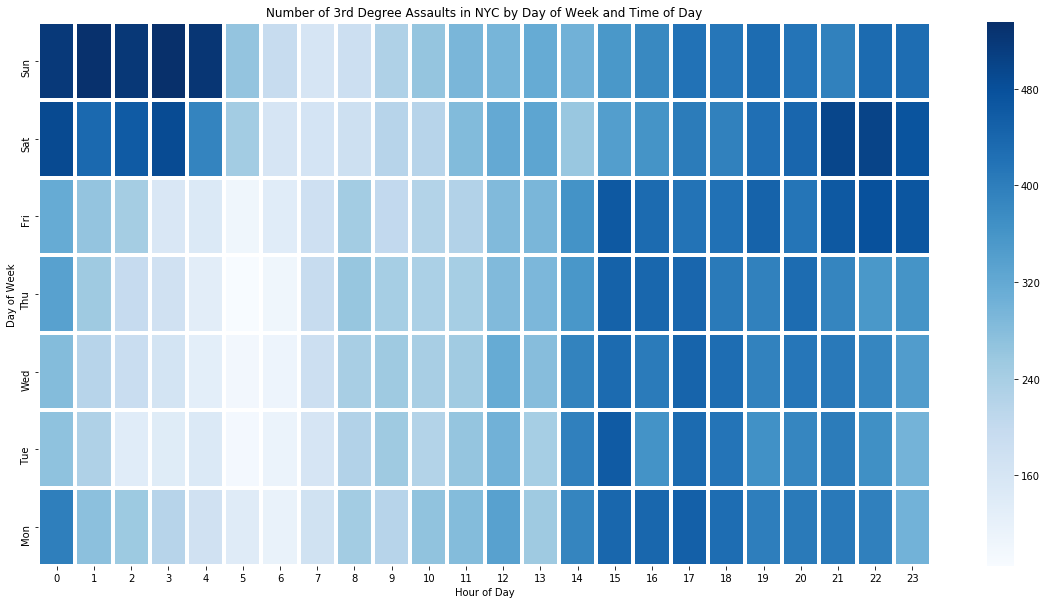

In [136]:
df_assault3 = df[df['OFNS_DESC']=='ASSAULT 3 & RELATED OFFENSES']

plt.figure(figsize=(20,10))
table = df_assault3.groupby(['DAY_OF_WEEK','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='Blues', linewidths=3);
g.invert_yaxis()

g.set_yticklabels(days)

plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.title('Number of 3rd Degree Assaults in NYC by Day of Week and Time of Day')

Looking on the weekend nights (Friday and Saturday between 10pm - 5am) we can see that there is a high concentration of 3rd Degree Assualts. This confirms the suspicion from the previous graph. The timing of the 3rd Degree Assaults correlate with ideal times of intoxication for party goers. We can conclude that the increase of 3rd Degree Assaults on the weekends are caused by alcohol consumption.

Text(0.5,1,'Number of Burglaries in NYC by Borough and Time of Day')

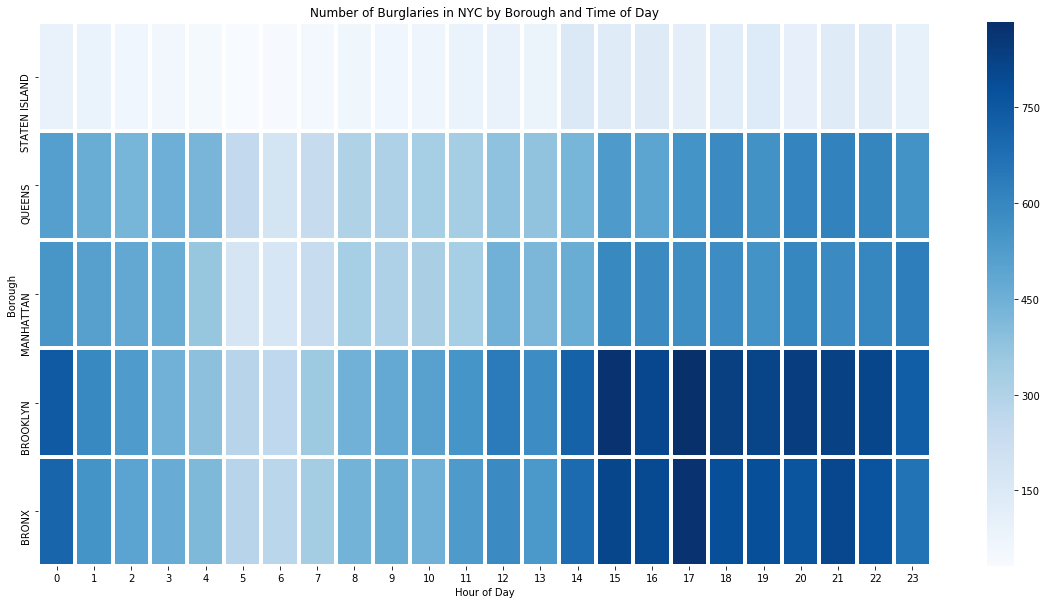

In [137]:
plt.figure(figsize=(20,10))
table = df_assault3.groupby(['BORO_NM','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='Blues', linewidths=3);
g.invert_yaxis()

plt.xlabel('Hour of Day')
plt.ylabel('Borough')

plt.title('Number of Burglaries in NYC by Borough and Time of Day')

We didn't expect this, but the concentration of these 3rd Degree Assaults occur in Bronx and Brooklyn not Manhattan. This was surprising to us as Manhattan has a denser population and active nightlife we expected there to be more 3rd Degree Assaults to occur there. This is consistent throughout the whole day.

Text(0.5,1,'Number of Petit Larceny (Thefts < $1000) Complaints in NYC by Day of Week and Time of Day')

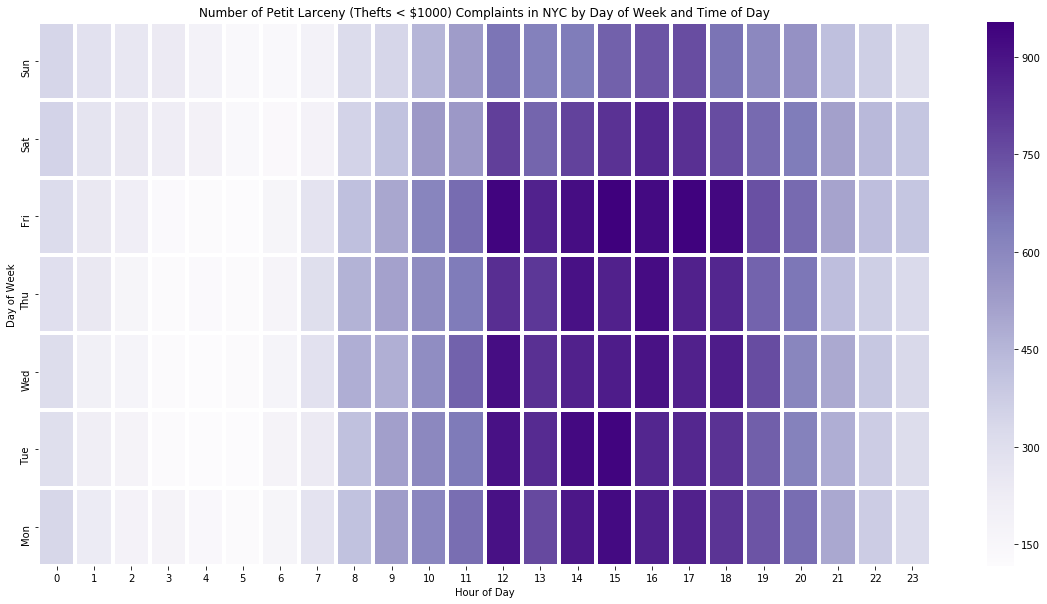

In [138]:
df_plarc = df[df['OFNS_DESC']=='PETIT LARCENY']

plt.figure(figsize=(20,10))
table = df_plarc.groupby(['DAY_OF_WEEK','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='Purples', linewidths=3);
g.invert_yaxis()

g.set_yticklabels(days)

plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
 
plt.title('Number of Petit Larceny (Thefts < $1000) Complaints in NYC by Day of Week and Time of Day')

For petit larceny, we can see the biggest concentration during the day between 12pm and 6pm. 12pm corresponds to lunch time, so as people are getting lunch there are a number of thefts that occur. 6pm corresponds to the tail end of rush hour. At the end of the day people are tired and on their way home. The streets and subways are packed, so the number of successful opportunities pickpockets have during this time are much greater.

Text(0.5,1,'Number of Grand Larceny (Thefts >= $1000) Complaints in NYC by Day of Week and Time of Day')

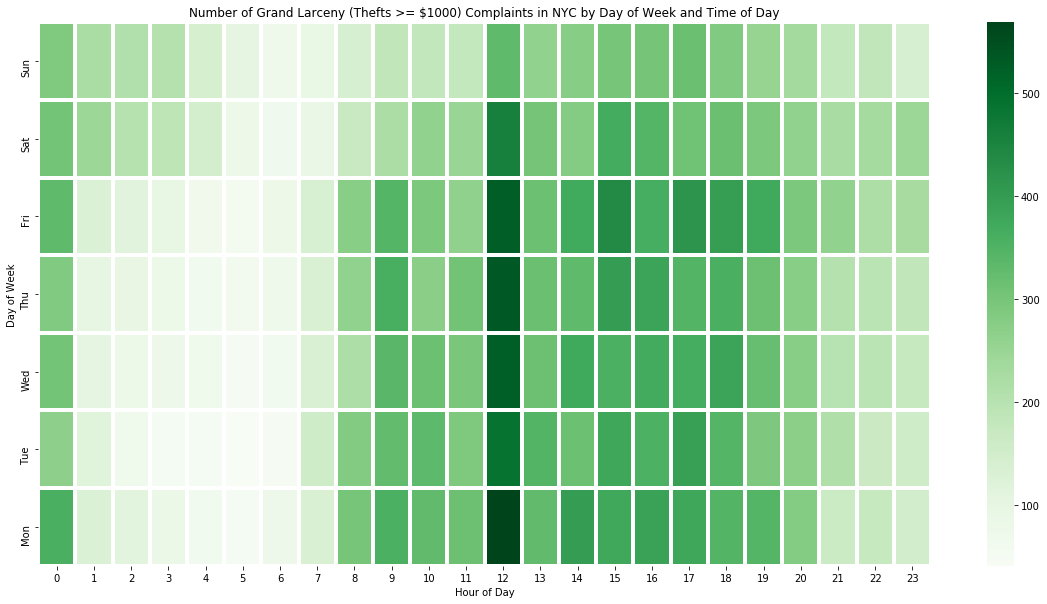

In [139]:
df_glarc = df[df['OFNS_DESC']=='GRAND LARCENY']

plt.figure(figsize=(20,10))
table = df_glarc.groupby(['DAY_OF_WEEK','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='Greens', linewidths=3);
g.invert_yaxis()

g.set_yticklabels(days)

plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.title('Number of Grand Larceny (Thefts >= $1000) Complaints in NYC by Day of Week and Time of Day')

Intrestingly, the largest concentration of grand larceny complaints are at noon. Grand larceny complaints do not have a high occurance during rush hour (relative to 12pm) like petit larceny does.

Out of curiousity we wondered if the same trend occurs for another kind of theft: burglaries.

Burglaries are a little different in nature as they involve entering a persons home to steal items there instead of on your person.

Text(0.5,1,'Number of Burglaries in NYC by Day of Week and Time of Day')

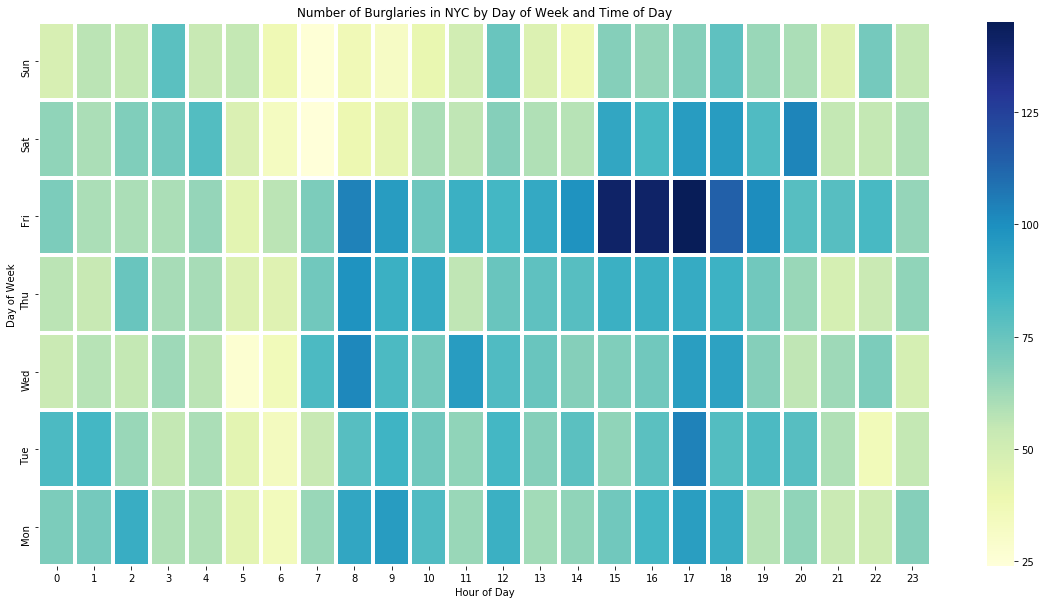

In [140]:
df_burg = df[df['OFNS_DESC']=='BURGLARY']

plt.figure(figsize=(20,10))
table = df_burg.groupby(['DAY_OF_WEEK','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='YlGnBu', linewidths=3);
g.invert_yaxis()

g.set_yticklabels(days)

plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.title('Number of Burglaries in NYC by Day of Week and Time of Day')

We observe that there is pretty even distribution of burglaries occuring through out the week except for Friday. There is a high concentration of burglaries that occur between 3pm and 5pm. We are not sure why this is, but we are curious on where this is occuring. We tried looking at a geographic heatmap using latitude and logitude to identify if there was a concentration somewhere, but found it spreadout.

### Q: For burglary specifically, what happened on Fridays? Where did those incidents occur?

Text(0.5,1,'Number of Burglaries in NYC by Day of Week and Time of Day')

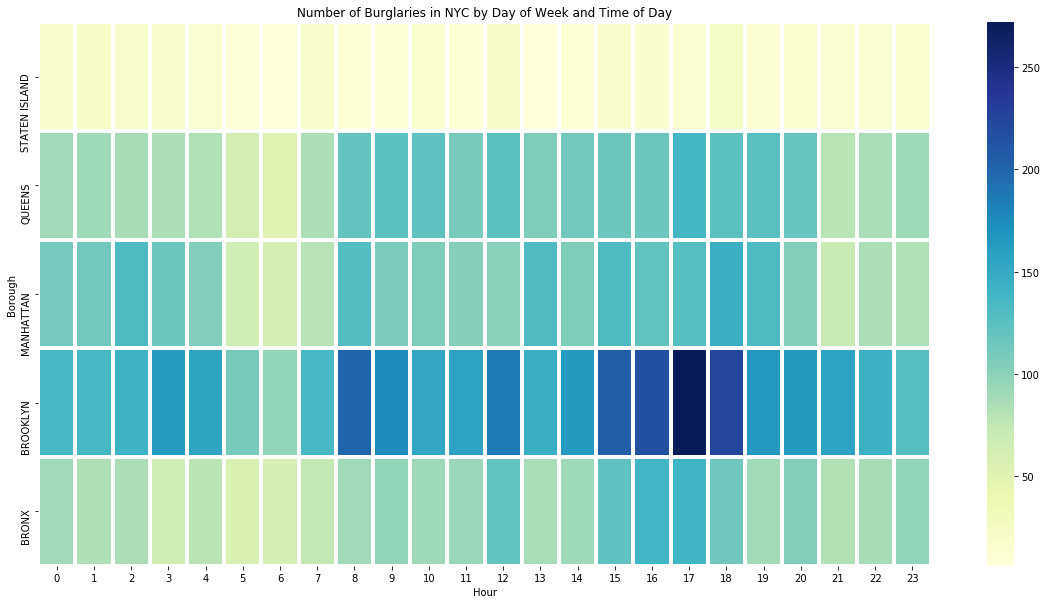

In [141]:
df_burg = df[df['OFNS_DESC']=='BURGLARY']

plt.figure(figsize=(20,10))
table = df_burg.groupby(['BORO_NM','HOUR']).size().unstack()
g = sns.heatmap(table, cmap='YlGnBu', linewidths=3);
g.invert_yaxis()

plt.xlabel('Hour')
plt.ylabel('Borough')

plt.title('Number of Burglaries in NYC by Day of Week and Time of Day')

Here we see that Brooklyn is where the majority of the burgalires that occur between 3pm and 5pm. Perhaps Burglars are targeting people who like in Brooklyn, but work in Manhattan. During 3pm and 5pm, they can be somewhat certain that the homeowner is still commuting back home and the streets are busy enough where people are concentrated on their own tasks. Of course this is all speculation.

#### 4.2.4 Heatmap

#### Distribution of Crimes for the Entire Year

In [ ]:
#Remove rows with borough unknown
for_map = df[df['BORO_NM'].notnull()]

#Calculate population density in each borough
for_map = for_map[['BORO_NM', 'Latitude', 'Longitude']]

In [ ]:
#Check if there is any missing value for coordinates
tp = for_map.isnull().sum()/len(for_map)
tp = tp[tp > 0]
tp.sort_values(inplace=True)
for_map = for_map.dropna()

In [ ]:
#Draw a heatmap to show the distribution density of crimes in NYC
def generateBaseMap(default_location=[40.7128, -74.0060], default_zoom_start=10):
    base_map = folium.Map(location=default_location, control_scale=True, tiles='Stamen Toner', zoom_start=default_zoom_start)
    return base_map

In [ ]:
base_map = generateBaseMap()
HeatMap(data=for_map[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [ ]:
folium.Marker([40.8448,-73.8648], popup=folium.Popup("Bronx")).add_to(base_map)
folium.Marker([40.6782,-73.9442], popup=folium.Popup("Brooklyn")).add_to(base_map)
folium.Marker([40.7831,-73.9712], popup=folium.Popup("Manhattan")).add_to(base_map)
folium.Marker([40.7282,-73.7949], popup=folium.Popup("Queens")).add_to(base_map)
folium.Marker([40.5795,-74.1502], popup=folium.Popup("Staten Island")).add_to(base_map)

In [ ]:
#base_map
#base_map.save('map.html')
Image(filename='entire year.png')

#### ****The codes below are included for references to the heatmap images inserted early on.

#### Distribution of Crimes for Jan. 1, 2018

In [57]:
#Check if there is any missing value for coordinates
tp = df_jan1.isnull().sum()/len(df_jan1)
tp = tp[tp > 0]
tp.sort_values(inplace=True)
df_jan1 = df_jan1.dropna()

In [58]:
base_map = generateBaseMap()
HeatMap(data=df_jan1[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [59]:
folium.Marker([40.7831,-73.9712], popup=folium.Popup("Manhattan")).add_to(base_map)

In [60]:
#base_map
#base_map.save('jan1_map.html')

#### Distribution of Crimes at 8am on Jan. 1, 2018

In [61]:
df_8 = df_jan1[df_jan1['HOUR'] == 8]

#Check if there is any missing value for coordinates
tp = df_8.isnull().sum()/len(df_8)
tp = tp[tp > 0]
tp.sort_values(inplace=True)

base_map = generateBaseMap()
HeatMap(data=df_8[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

folium.Marker([40.6782,-73.9442], popup=folium.Popup("Brooklyn")).add_to(base_map)

#base_map
#base_map.save('jan1_8am.html')

#### Distribution of Crimes at 12am on Jan. 1, 2018

In [62]:
df_0 = df_jan1[df_jan1['HOUR'] == 0]

#Check if there is any missing value for coordinates
tp = df_0.isnull().sum()/len(df_0)
tp = tp[tp > 0]
tp.sort_values(inplace=True)
#df_0 = df_0.dropna()

base_map = generateBaseMap()
HeatMap(data=df_0[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=18).add_to(base_map)

folium.Marker([40.6782,-73.9442], popup=folium.Popup("Brooklyn")).add_to(base_map)
folium.Marker([40.7831,-73.9712], popup=folium.Popup("Manhattan")).add_to(base_map)
folium.Marker([40.7282,-73.7949], popup=folium.Popup("Queens")).add_to(base_map)

#base_map
#base_map.save('jan1_12am.html')

#### Distribution of Crimes in QUEENS at 12pm on Jan. 1, 2018

In [63]:
df_12 = df_jan1[df_jan1['HOUR'] == 12]

#Check if there is any missing value for coordinates
tp = df_12.isnull().sum()/len(df_12)
tp = tp[tp > 0]
tp.sort_values(inplace=True)
#df_12Q = df_12Q.dropna()

base_map = generateBaseMap()
HeatMap(data=df_12[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=18).add_to(base_map)

folium.Marker([40.7282,-73.7949], popup=folium.Popup("Queens")).add_to(base_map)

#base_map
#base_map.save('jan1_12pm.html')

## 6.1 Summary and Recommendations

### 6.1.1 Summary

Given that we obtained so many information based on our analysis above, we decided to conclude on the most interesting facts that would actually help NYPD in the future.

First of all, we discovered that black people take up the largest portion of suspects in NYC and they are also most likely to become victims of all types of crimes regardless of the missing values. Also, we found that most black victims live in either Brooklyn, Queens and Manhattan. Based on the bar charts we created later, we could also tell that people between 25 and 44 years old are the most volatile to become victims in NYC. And females have slightly higher possibility of being targeted by criminals than males. 

Moving on to our major analysis, we looked into the likelihood of crimes occurred at different time and on different days of the week by using heatmaps. We found that there was a huge pike of the number of crimes happened on Jan. 1, 2018. Diving deeper into it, we found that lots of incidents happened at midnight, around 8am and at noon on that day. 

### 6.2.1 Recommendations

Based on the findings, we would like to make several recommendations to NYPD as well as citizens that live in NYC.

As for NYPD, we would suggest them send more police to Manhattan, Queens and Brooklyn on the first day of each year. We are not sure whether similar incidents occur every year due to the lack of data, but we do believe that there is high likelihood for crimes to take place on New Year's Eve as people tend to go out to celebrate until late in the night. Also, we think that more police are needed during the summer as there are much more incidents happening during that time. Given the decreasing trend of crimes from weekdays to weekends for assault, especially from 10pm to 5am over the weekends, we believe that NYC citizens need more protections during that time.

In terms of the most common types of crimes, NYPD need to pay more attention to burglaries in Brooklyn and Bronx from 3pm to 5pm. Between 12pm to 18pm on weekdays, petit larceny happened a lot, so people living in NYC should be well aware of that. Compared to petit larceny, grand larceny tend to take place at noon on weekdays, which businesses should be more aware of.

For citizens in general, we would recommend them not go outside too often between 10pm and 5am, especially if they reisde in Brooklyn and Bronx. Also, try to be away from areas during certain time periods that we mentioned above to stay safe.